# Dataset Information

Name as per Notion : Autism screening data for toddlers

Link: https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers

# EDA Summary

#### 1. Imported the dataset
#### 2. Renamed the columns for easy of readability
#### 3. Checked for unique values, duplicate rows and missing values
#### 4. Performed Univariate and Bi-Variate analysis
#### 5. Encoded the categorical features
#### 6. Performed multivariate analysis
#### 7. Removed columns with high VIF
#### 8. Created Logistic Regression model with and withour SMOTE
#### 9. Created KNN without SMOTE

In [283]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

# Data Dictionary

* A1: Question 1 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* A2: Question 2 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* A3: Question 3 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* A4: Question 4 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used 

* A5: Question 5 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used 

* A6: A6: Question 6 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used 

* A7: Question 7 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* A8: Question 8 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used 

* A9: Question 9 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* A:10 Question 10 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* Age	Number: 	Toddlers (months)

* Score by Q-chat-10: 	Number	1-10 (Less that or equal 3 no ASD traits; > 3 ASD traits

* Sex	Character:	Male or Female 

* Ethnicity:	String	List of common ethnicities in text format 

* Born with jaundice:	Boolean  (yes or no)	Whether the case was born with jaundice

* Family member with ASD history:	Boolean  (yes or no)	Whether any immediate family member has a PDD 

* Who is completing the test:	String 	Parent, self, caregiver, medical staff, clinician ,etc.

* Why_are_you_taken_the_screening	String:	Use input textbox 

* Class variable 	String 	ASD traits or No ASD traits: (automatically assigned by the ASDTests app). (Yes / No)


# Importing data

In [284]:
df = pd.read_csv("Toddler Autism dataset July 2018.csv")
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [285]:
# This code snippet uses the pandas library to read in a CSV file named "Toddler Autism dataset July 2018.csv"
# and assigns it to the variable "df"

import pandas as pd

df = pd.read_csv("Toddler Autism dataset July 2018.csv")

# The "head()" function is then called on the "df" DataFrame, which returns the first five rows of the data
# This is useful for quickly checking the structure and contents of the DataFrame
df.head()


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [286]:
# renaming the columns of the dataframe

df.columns = df.columns.str.replace('/','_').str.replace(' ','')

rename_columns = {
    'Age_Mons':'Age_In_Months',
    'Qchat-10-Score':'Qchat_10_Score',
    'Family_mem_with_ASD': 'Family_Mem_With_ASD',
    'Class_ASDTraits' : 'ASD_Diagnosed',
    'Whocompletedthetest' : 'Who_Completed_The_Test'
}

df.rename(columns=rename_columns, inplace=True)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_In_Months           1054 non-null   int64 
 12  Qchat_10_Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

#### Inference

* No null values are present
* Total 1054 records of toddlers and 18 predictors excluding the target variable
* Contains 13 numeric features and 6 string features
* Case_No is an unwanted variable and hence can be removed from the dataset
* Based on the data dictionary Qchat_10_score column can also be dropped, however let us check the correlation with target variable and then decide upon it

In [288]:
# Dropping the unwanted variable

df.drop('Case_No', inplace=True, axis=1)

# Exploratory Data Analysis

In [289]:
# Displaying first 5 rows

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_In_Months,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_Mem_With_ASD,Who_Completed_The_Test,ASD_Diagnosed
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [290]:
# Displaying last 5 rows

df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_In_Months,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_Mem_With_ASD,Who_Completed_The_Test,ASD_Diagnosed
1049,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No
1053,1,1,0,0,1,1,0,1,1,0,24,6,m,asian,yes,yes,family member,Yes


In [291]:
# descriptive summary of the numeric features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,1054.0,0.563567,0.496178,0.0,0.0,1.0,1.0,1.0
A2,1054.0,0.448767,0.497604,0.0,0.0,0.0,1.0,1.0
A3,1054.0,0.401328,0.490400,0.0,0.0,0.0,1.0,1.0
A4,1054.0,0.512334,0.500085,0.0,0.0,1.0,1.0,1.0
A5,1054.0,0.524668,0.499628,0.0,0.0,1.0,1.0,1.0
A6,1054.0,0.576850,0.494293,0.0,0.0,1.0,1.0,1.0
A7,1054.0,0.649905,0.477226,0.0,0.0,1.0,1.0,1.0
A8,1054.0,0.459203,0.498569,0.0,0.0,0.0,1.0,1.0
A9,1054.0,0.489564,0.500128,0.0,0.0,0.0,1.0,1.0
A10,1054.0,0.586338,0.492723,0.0,0.0,1.0,1.0,1.0


#### Inference

* A1 to A10 can be considered as binary categorical variables
* Average age of a toddler is 27 months and w.r.t median age we can see the data is slightly left skewed
* The age ranges from 1 to 3 years
* Nearly 75% of the Qchat scores are above 3 which is the cut-off for ASD classification

In [292]:
# descriptive summary of the string features

df.describe(include='object').T

,count,unique,top,freq
Sex,1054,2,m,735
Ethnicity,1054,11,White European,334
Jaundice,1054,2,no,766
Family_Mem_With_ASD,1054,2,no,884
Who_Completed_The_Test,1054,5,family member,1018
ASD_Diagnosed,1054,2,Yes,728


#### Inference

* Male toddlers are found to be having the highest proportion
* Majority of the toddlers belong to white european ethinicity
* Most of the toddlers were not diagnosed with Jaundice at early stages
* More than 90% of the test givers were family members

In [293]:
print("Unqiue values per column:")
df.nunique()

Unqiue values per column:


A1                         2
A2                         2
A3                         2
A4                         2
A5                         2
A6                         2
A7                         2
A8                         2
A9                         2
A10                        2
Age_In_Months             25
Qchat_10_Score            11
Sex                        2
Ethnicity                 11
Jaundice                   2
Family_Mem_With_ASD        2
Who_Completed_The_Test     5
ASD_Diagnosed              2
dtype: int64

In [294]:
# check for duplicate columns

print("Number of duplicate rows:", df.duplicated().sum())
df[df.duplicated()]

Number of duplicate rows: 79


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_In_Months,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_Mem_With_ASD,Who_Completed_The_Test,ASD_Diagnosed
33,0,0,0,0,0,0,0,0,0,0,12,0,f,middle eastern,no,no,family member,No
38,0,0,0,0,0,0,0,0,0,0,15,0,f,middle eastern,no,no,family member,No
39,0,0,0,0,0,0,0,0,0,1,15,1,f,middle eastern,no,no,family member,No
40,0,0,0,0,0,0,0,0,0,1,12,1,f,middle eastern,no,no,family member,No
42,0,0,0,0,0,0,0,0,0,0,15,0,f,black,no,no,family member,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,0,0,0,1,1,0,1,0,1,35,4,f,asian,no,no,family member,Yes
1006,1,0,1,1,1,0,1,0,0,1,24,6,m,asian,no,no,family member,Yes
1022,0,0,0,0,0,0,0,0,0,0,36,0,f,White European,no,yes,family member,No
1026,0,0,0,0,0,0,0,0,0,1,36,1,m,White European,no,no,family member,No


#### Inference

Even though each records are unique, presence of duplicate columns does not have any significance in contribution to model prediction and hence these have to be removed

In [295]:
# dropping the duplicate rows

df = df.drop_duplicates()

print("Number of duplicate rows after treatment:", df.duplicated().sum())

Number of duplicate rows after treatment: 0


In [296]:
# checking the dimensions of the data

df.shape

(975, 18)

# Univariate Analysis

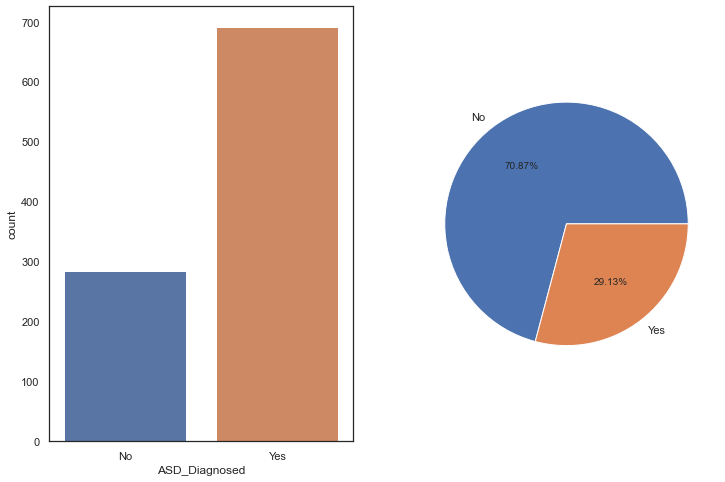

In [297]:
# checking the target variable - accident severity for class imbalance

plt.figure(figsize=(12,8))

# bar plot

ax1 = plt.subplot(1,2,1)
countplot = sns.countplot(x=df['ASD_Diagnosed'])

ax2 = plt.subplot(1,2,2)
plt.pie(x=df['ASD_Diagnosed'].value_counts(), labels= list(df['ASD_Diagnosed'].unique()), autopct='%1.2f%%')

plt.show()

In [298]:
# Univariate analysis on numeric columns

def univariate_analysis(column,nbins):
    print('\033[1m'+ "Description of " + column + '\033[0m' + '\n' )
    print(df[column].describe())
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "Distribution of " + column + '\033[0m' + '\n')
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "BoxPlot of " + column + '\033[0m' + '\n')
    ax = sns.boxplot(x=df[column])
    plt.show()
    print("----------------------------------------------------------------------------")
    

Description of A1

count    975.000000
mean       0.575385
std        0.494538
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A1, dtype: float64
----------------------------------------------------------------------------
Distribution of A1



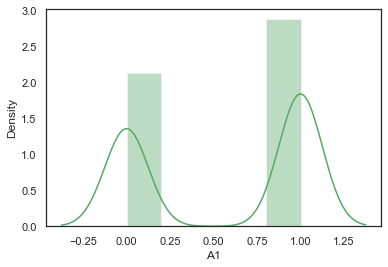

----------------------------------------------------------------------------
BoxPlot of A1



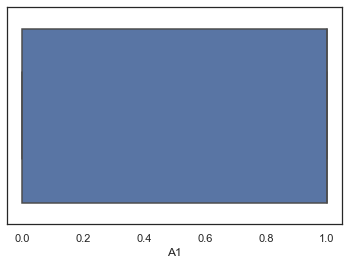

----------------------------------------------------------------------------
Description of A2

count    975.000000
mean       0.457436
std        0.498441
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A2, dtype: float64
----------------------------------------------------------------------------
Distribution of A2



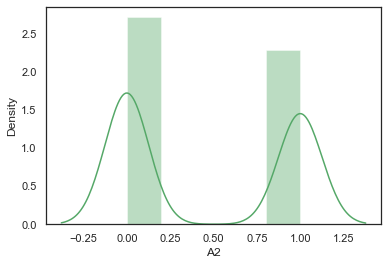

----------------------------------------------------------------------------
BoxPlot of A2



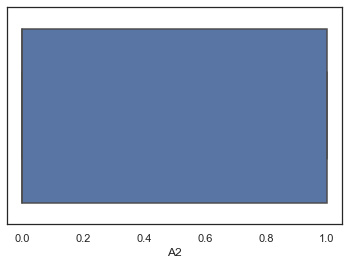

----------------------------------------------------------------------------
Description of A3

count    975.000000
mean       0.397949
std        0.489726
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A3, dtype: float64
----------------------------------------------------------------------------
Distribution of A3



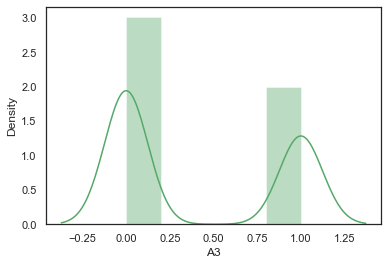

----------------------------------------------------------------------------
BoxPlot of A3



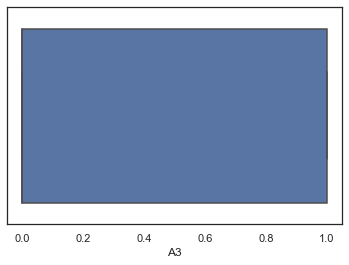

----------------------------------------------------------------------------
Description of A4

count    975.000000
mean       0.517949
std        0.499934
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A4, dtype: float64
----------------------------------------------------------------------------
Distribution of A4



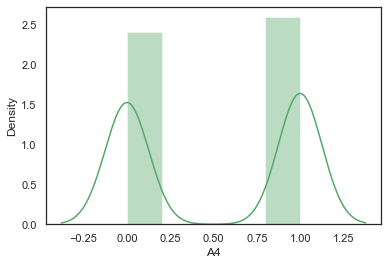

----------------------------------------------------------------------------
BoxPlot of A4



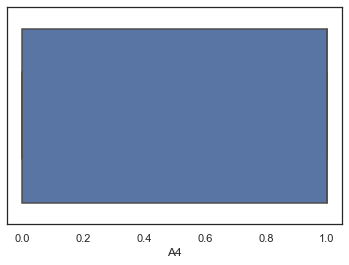

----------------------------------------------------------------------------
Description of A5

count    975.000000
mean       0.530256
std        0.499340
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A5, dtype: float64
----------------------------------------------------------------------------
Distribution of A5



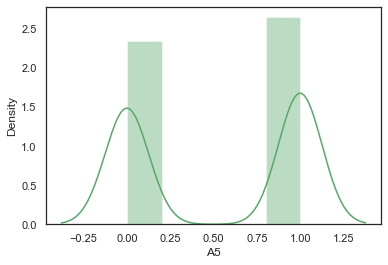

----------------------------------------------------------------------------
BoxPlot of A5



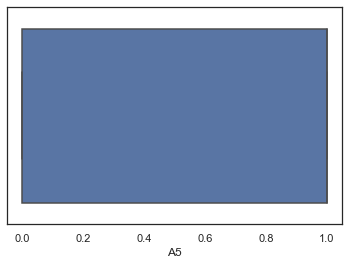

----------------------------------------------------------------------------
Description of A6

count    975.000000
mean       0.583590
std        0.493216
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A6, dtype: float64
----------------------------------------------------------------------------
Distribution of A6



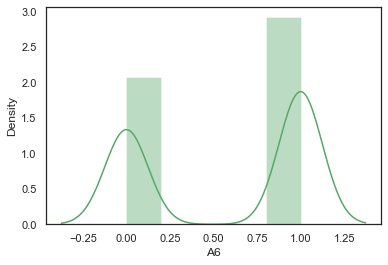

----------------------------------------------------------------------------
BoxPlot of A6



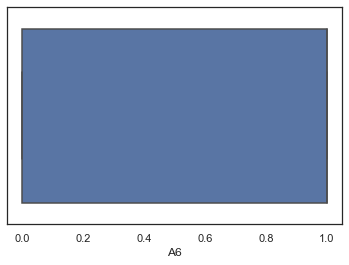

----------------------------------------------------------------------------
Description of A7

count    975.000000
mean       0.667692
std        0.471282
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A7, dtype: float64
----------------------------------------------------------------------------
Distribution of A7



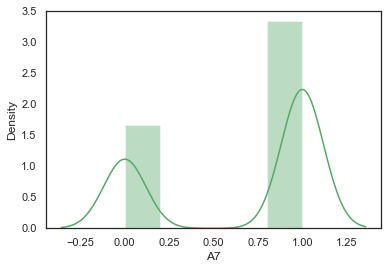

----------------------------------------------------------------------------
BoxPlot of A7



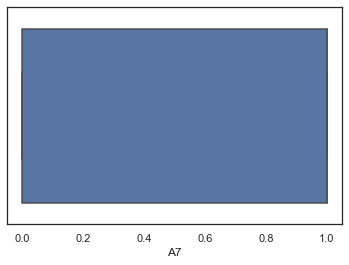

----------------------------------------------------------------------------
Description of A8

count    975.000000
mean       0.464615
std        0.499002
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A8, dtype: float64
----------------------------------------------------------------------------
Distribution of A8



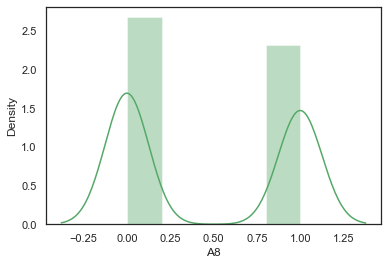

----------------------------------------------------------------------------
BoxPlot of A8



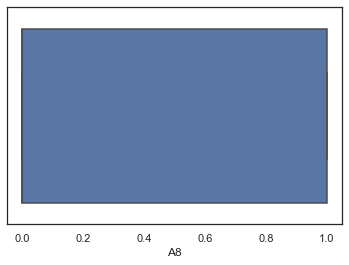

----------------------------------------------------------------------------
Description of A9

count    975.000000
mean       0.497436
std        0.500250
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A9, dtype: float64
----------------------------------------------------------------------------
Distribution of A9



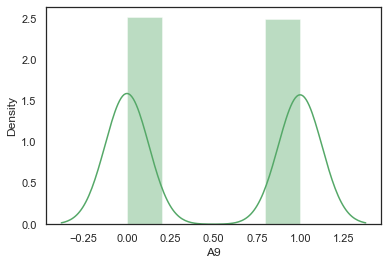

----------------------------------------------------------------------------
BoxPlot of A9



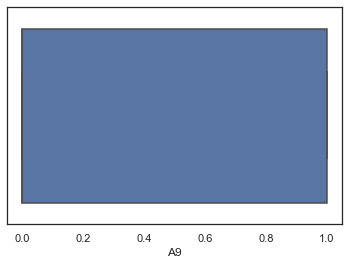

----------------------------------------------------------------------------
Description of A10

count    975.000000
mean       0.585641
std        0.492864
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A10, dtype: float64
----------------------------------------------------------------------------
Distribution of A10



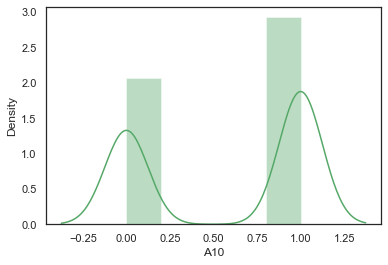

----------------------------------------------------------------------------
BoxPlot of A10



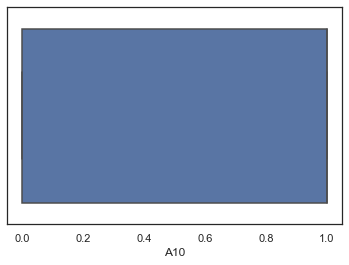

----------------------------------------------------------------------------
Description of Age_In_Months

count    975.000000
mean      27.899487
std        7.855350
min       12.000000
25%       23.000000
50%       30.000000
75%       36.000000
max       36.000000
Name: Age_In_Months, dtype: float64
----------------------------------------------------------------------------
Distribution of Age_In_Months



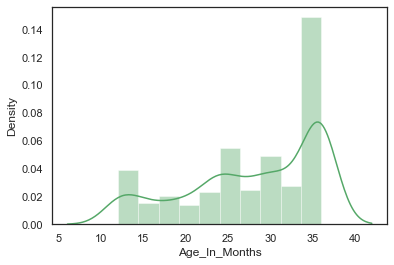

----------------------------------------------------------------------------
BoxPlot of Age_In_Months



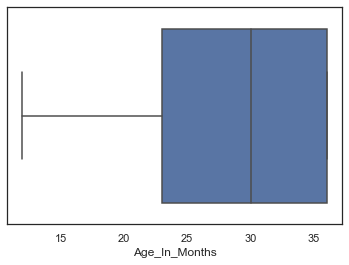

----------------------------------------------------------------------------
Description of Qchat_10_Score

count    975.000000
mean       5.277949
std        2.818915
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Qchat_10_Score, dtype: float64
----------------------------------------------------------------------------
Distribution of Qchat_10_Score



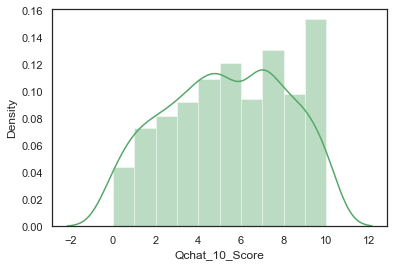

----------------------------------------------------------------------------
BoxPlot of Qchat_10_Score



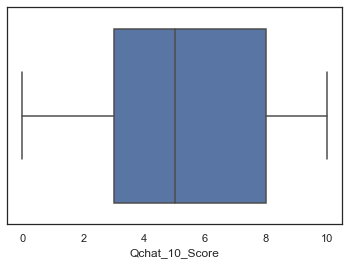

----------------------------------------------------------------------------


In [299]:
for column in list(df.select_dtypes(exclude='object').columns):
    univariate_analysis(column,20)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'A1'),
  Text(2, 0, 'A2'),
  Text(3, 0, 'A3'),
  Text(4, 0, 'A4'),
  Text(5, 0, 'A5'),
  Text(6, 0, 'A6'),
  Text(7, 0, 'A7'),
  Text(8, 0, 'A8'),
  Text(9, 0, 'A9'),
  Text(10, 0, 'A10'),
  Text(11, 0, 'Age_In_Months'),
  Text(12, 0, 'Qchat_10_Score')])

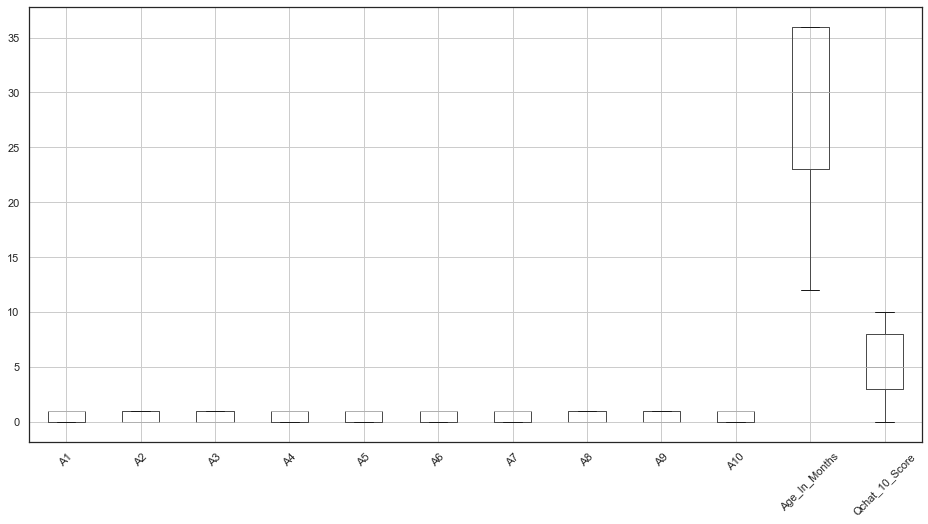

In [300]:
# Checking the presence of outliers in the dataset all columns at once

plt.figure(figsize=(16,8))
df.boxplot()
plt.xticks(rotation=45)

####  There aren't any outliers in the dataset

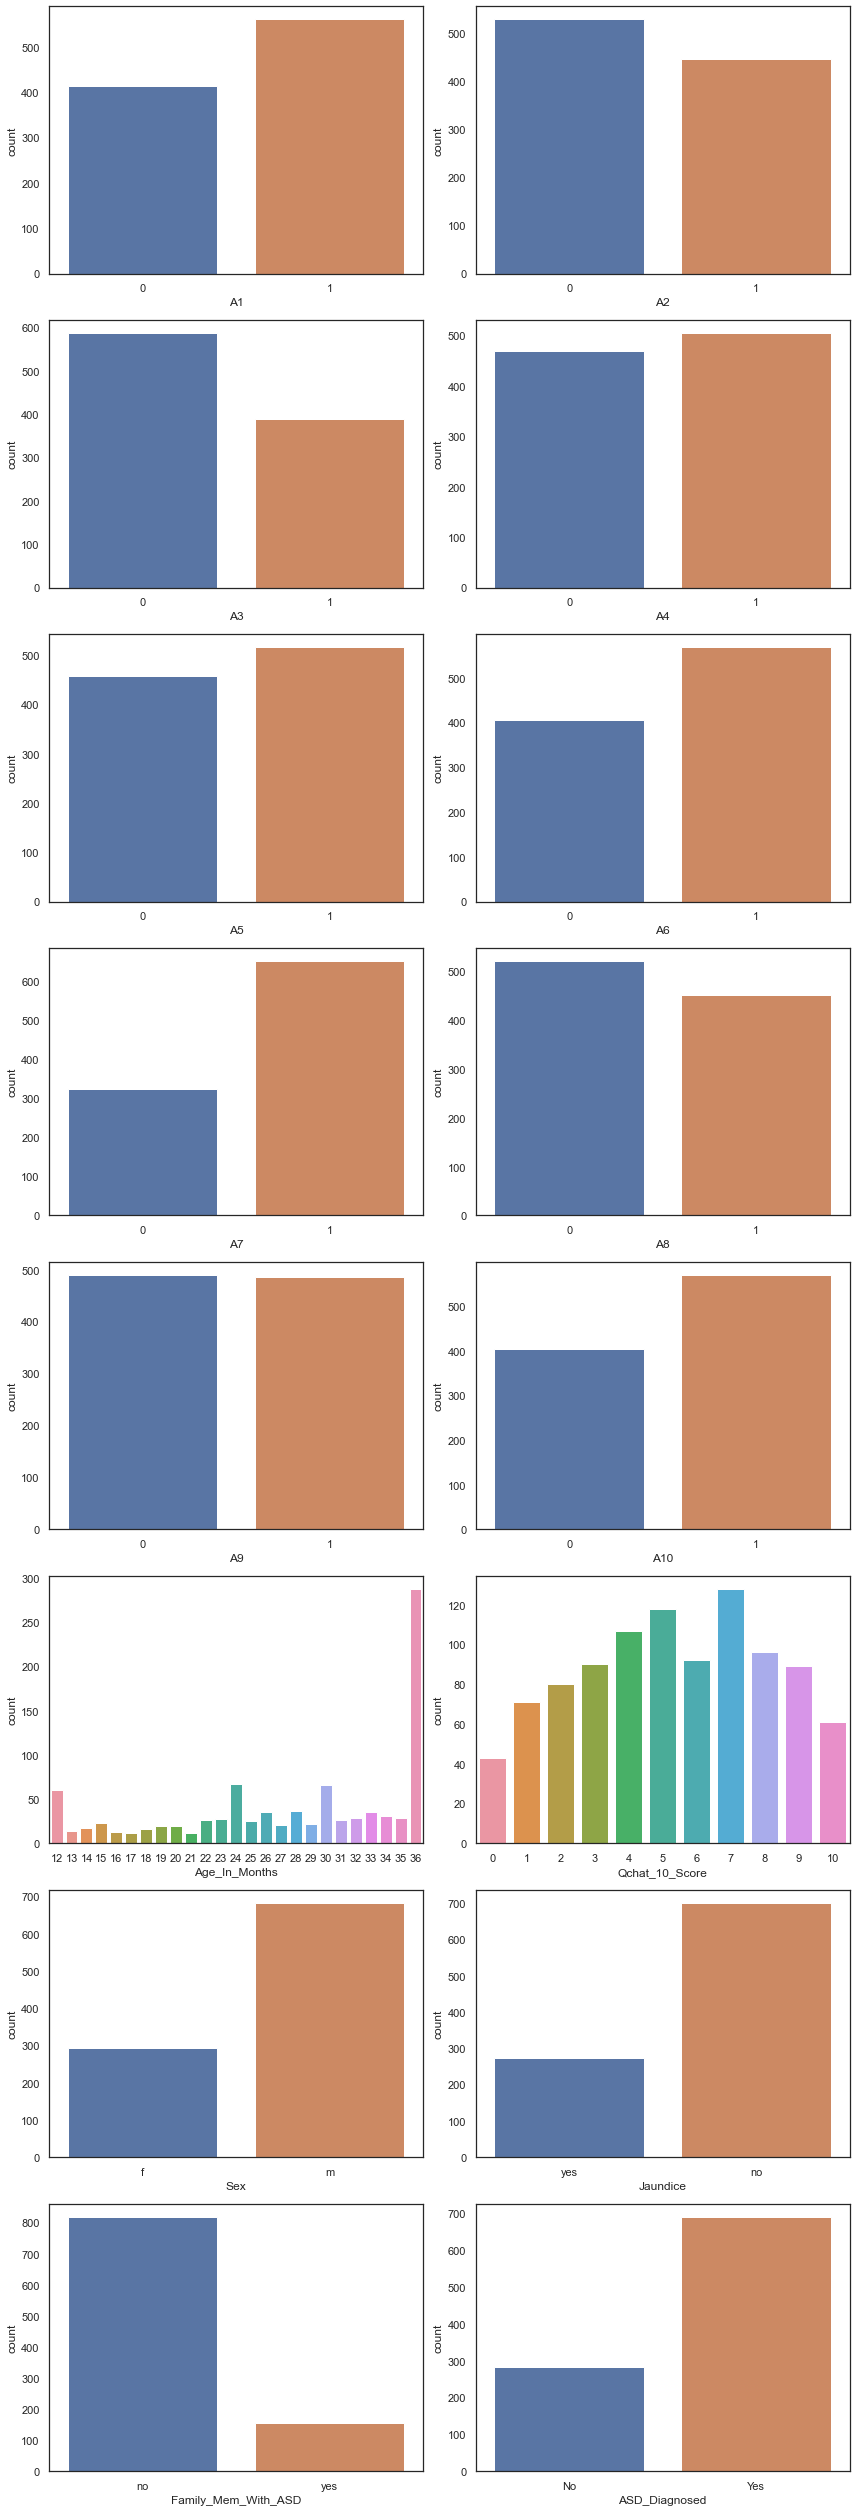

In [301]:
# Count plot of all object columns

plt.figure(figsize=(12,35))
plotnumber = 1

for column in df.drop(['Ethnicity','Who_Completed_The_Test'], axis=1):
    if plotnumber <=df.shape[1]:
        ax1 = plt.subplot(8,2,plotnumber)
        sns.countplot(data=df, x=column)
    plotnumber +=1
plt.tight_layout()
        


<AxesSubplot:xlabel='A1', ylabel='ASD_Diagnosed'>

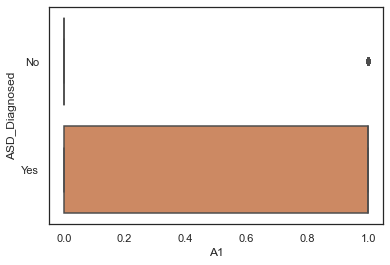

In [302]:
sns.boxplot(x=df['A1'], y=df['ASD_Diagnosed'])

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

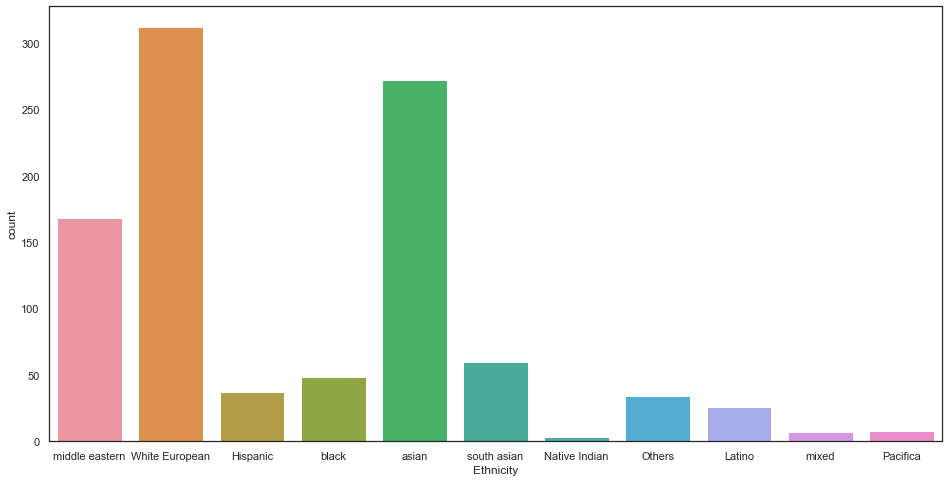

In [303]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Ethnicity')

<AxesSubplot:xlabel='Who_Completed_The_Test', ylabel='count'>

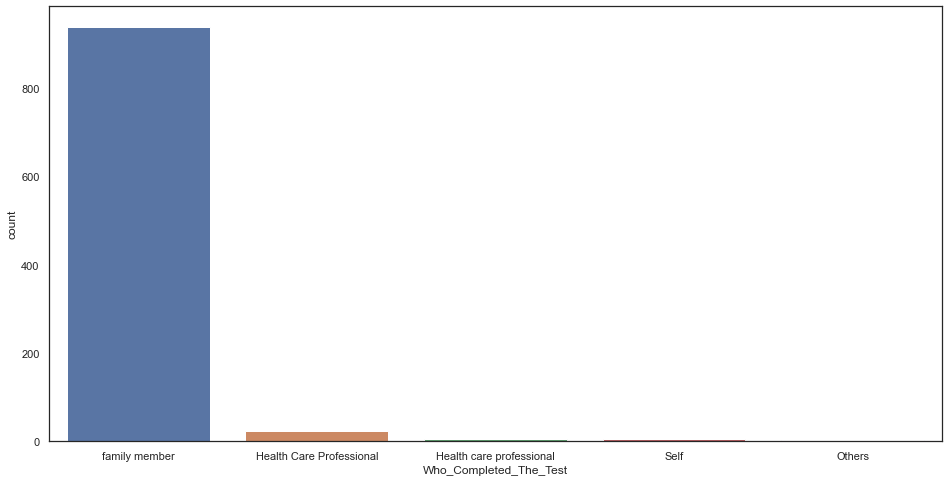

In [304]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Who_Completed_The_Test')

### Inference

* Age column can be binned to check the performance of the model
* Ethnicity should be checked during feature engineering if its a significant predictor or not
* Who_Completed_The_Test column has more than 90% of the observations having "family member" value. This column might not effectively contribute as a significant predictor, however its significance must be evaluated
* The rest of the columns seems to fine w.r.t class balance

# Bi-Variate Analysis

### Analysis of features w.r.t target variable - ASD_Diagnosed

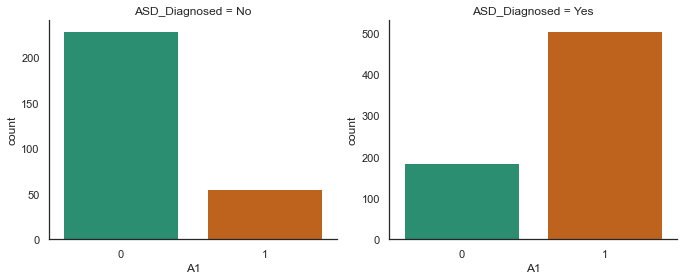

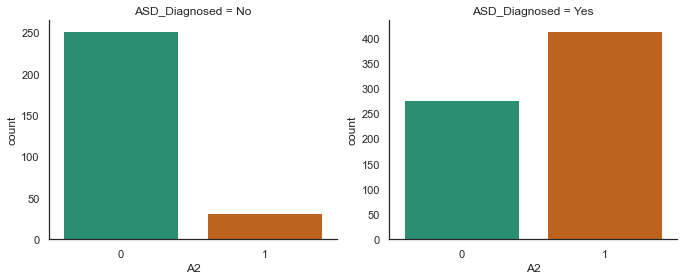

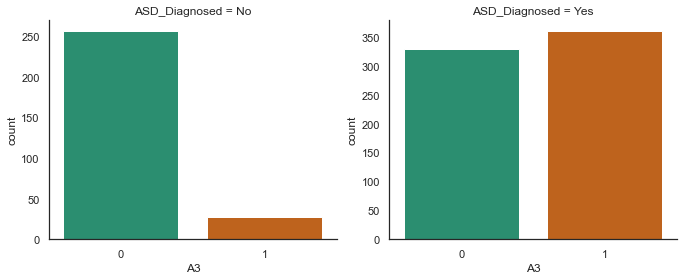

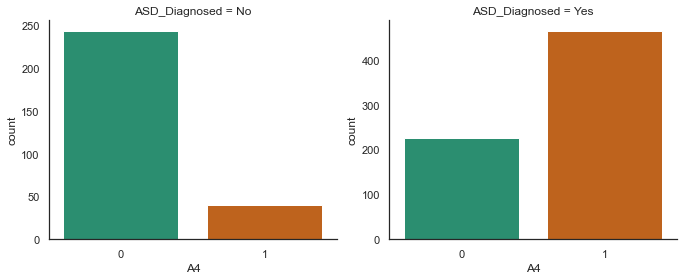

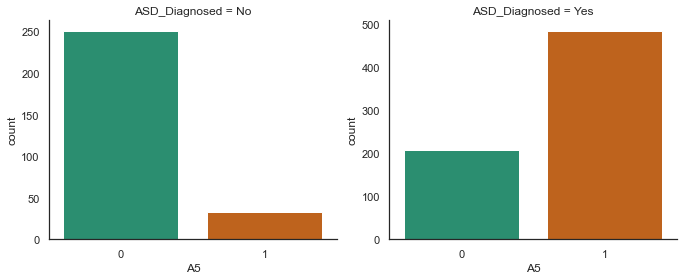

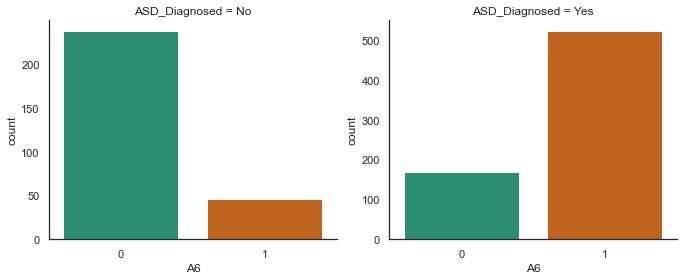

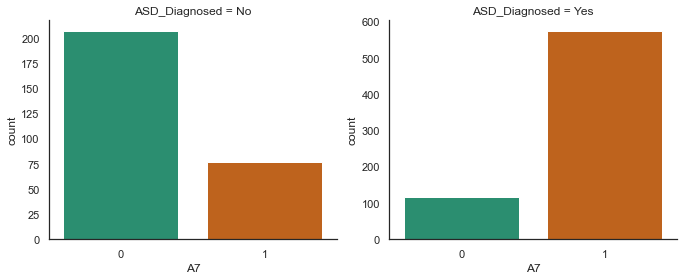

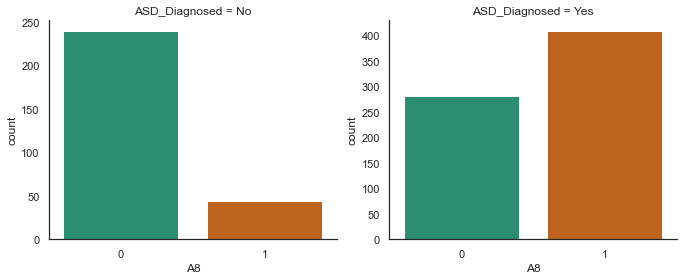

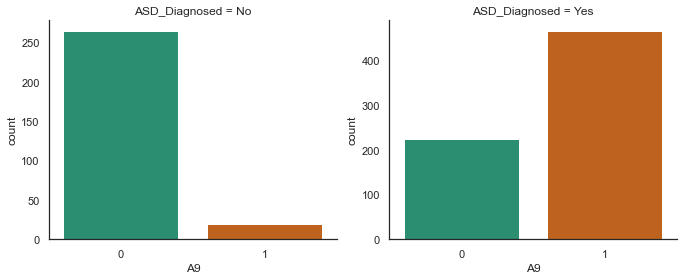

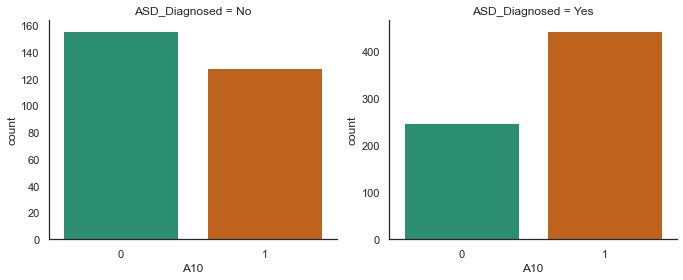

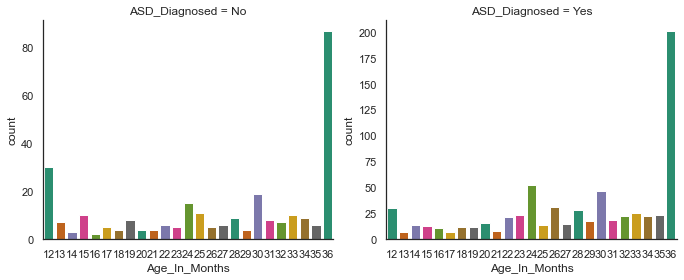

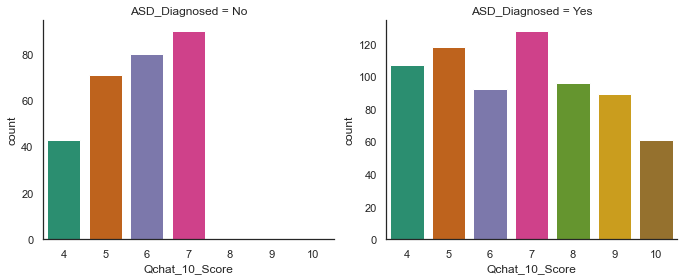

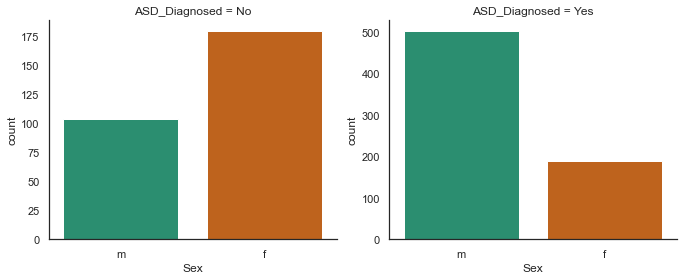

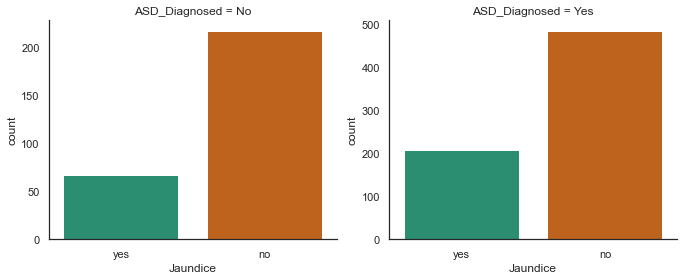

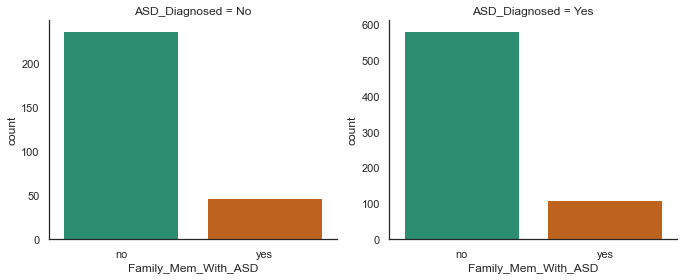

In [305]:
for col in df.drop(['Ethnicity','Who_Completed_The_Test','ASD_Diagnosed'], axis=1):
    g = sns.FacetGrid(df, col='ASD_Diagnosed', size=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

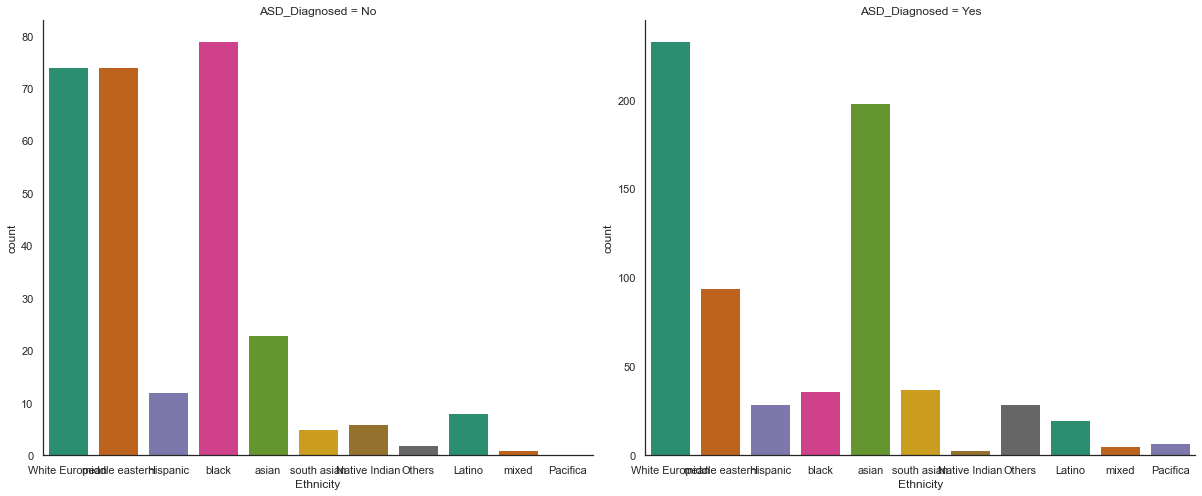

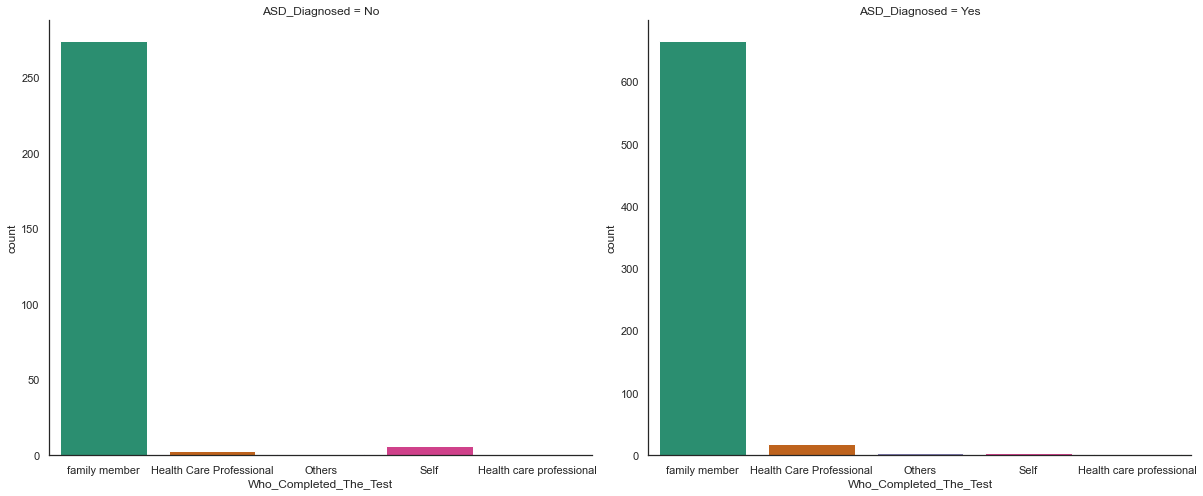

In [306]:
for col in df[['Ethnicity','Who_Completed_The_Test']]:
    g = sns.FacetGrid(df, col='ASD_Diagnosed', size=7, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

In [307]:
# Checking the count of toddlers across different ethnicities

df.Ethnicity.value_counts(normalize=True)

White European    0.320000
asian             0.278974
middle eastern    0.172308
south asian       0.061538
black             0.049231
Hispanic          0.037949
Others            0.034872
Latino            0.026667
Pacifica          0.008205
mixed             0.007179
Native Indian     0.003077
Name: Ethnicity, dtype: float64

In [308]:
df.groupby(['Ethnicity', 'ASD_Diagnosed']).size()  * 100 / df.groupby('Ethnicity').size()


Ethnicity       ASD_Diagnosed
Hispanic        No                21.621622
                Yes               78.378378
Latino          No                23.076923
                Yes               76.923077
Native Indian   Yes              100.000000
Others          No                14.705882
                Yes               85.294118
Pacifica        No                12.500000
                Yes               87.500000
White European  No                25.320513
                Yes               74.679487
asian           No                27.205882
                Yes               72.794118
black           No                25.000000
                Yes               75.000000
middle eastern  No                44.047619
                Yes               55.952381
mixed           No                28.571429
                Yes               71.428571
south asian     No                38.333333
                Yes               61.666667
dtype: float64

In [309]:
# Checking the proportion of top 3 ethnicities

df[df['Ethnicity'].isin(['White European','asian','middle eastern'])].shape[0]*100/df.shape[0]

77.12820512820512

In [310]:
# Storing all the records for ASD_Diagnosed="Yes" in one dataframe

df_Yes = df[df['ASD_Diagnosed']=="Yes"]

# Finding the total proportion of toddlers diagnosed with ASD among these 3 ethnic groups

df_Yes[df_Yes['Ethnicity'].isin(['White European','asian','middle eastern'])].shape[0]*100/df_Yes.shape[0]
    

75.9768451519537

### Inference
* It is interesting to note, there are toddlers who are found to be non-autistic having a Qchat_10_Score greater than 3
* Except A2, A3 & A8, all other questions were able to significantly distinguish between autistic and non-autistic
* The age of the toddler, Jaundice, Family men with ASD history, who_completed_the_test however doesnt provide any clear distinction between the classes
* As we have 70% of the dataset to be male toddlers, the diagnosis count is highest for them compared to females
* Majority of the toddlers who were diagnosed as autistic belong to asian and white european ethnicity

### Inference based on ethnic groups
* Ethnic groups such as white European, Asian, and Middle Eastern make up 77% of the entire data set.
* These three groups combined represent 75.9% of all toddlers who have been diagnosed with ASD.


# Encoding of the features

In [311]:
df_Ethnic = df[df['Ethnicity'].isin(['White European','asian','middle eastern'])]

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 1053
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      975 non-null    int64 
 1   A2                      975 non-null    int64 
 2   A3                      975 non-null    int64 
 3   A4                      975 non-null    int64 
 4   A5                      975 non-null    int64 
 5   A6                      975 non-null    int64 
 6   A7                      975 non-null    int64 
 7   A8                      975 non-null    int64 
 8   A9                      975 non-null    int64 
 9   A10                     975 non-null    int64 
 10  Age_In_Months           975 non-null    int64 
 11  Qchat_10_Score          975 non-null    int64 
 12  Sex                     975 non-null    object
 13  Ethnicity               975 non-null    object
 14  Jaundice                975 non-null    object
 15  Famil

In [313]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_In_Months', 'Qchat_10_Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_Mem_With_ASD', 'Who_Completed_The_Test', 'ASD_Diagnosed'],
      dtype='object')

### Inference
* All the categorical columns are nominal in nature

In [314]:
# Encoding the target variable
# Encoding "Yes" to 1 and "No" to 0

df['ASD_Diagnosed'].replace({'Yes':1, 'No':0}, inplace=True)

In [315]:
def ordinal_encoder(df, feats): 
    """
    This function takes in a DataFrame and a list of features, and replaces the values of the features with their corresponding ordinal values. 
    The ordinal values are integers starting from 0, and are determined by the unique values of the feature.
    Inputs:
        df: DataFrame
        feats: list of features (strings)
    Output:
        DataFrame with ordinal encoded features based on their frequency of occurence!!
    """
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df


In [316]:
df = ordinal_encoder(df, df.drop(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_In_Months', 'Qchat_10_Score','ASD_Diagnosed'], axis=1).columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 1053
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   A1                      975 non-null    int64
 1   A2                      975 non-null    int64
 2   A3                      975 non-null    int64
 3   A4                      975 non-null    int64
 4   A5                      975 non-null    int64
 5   A6                      975 non-null    int64
 6   A7                      975 non-null    int64
 7   A8                      975 non-null    int64
 8   A9                      975 non-null    int64
 9   A10                     975 non-null    int64
 10  Age_In_Months           975 non-null    int64
 11  Qchat_10_Score          975 non-null    int64
 12  Sex                     975 non-null    int32
 13  Ethnicity               975 non-null    int32
 14  Jaundice                975 non-null    int32
 15  Family_Mem_With_ASD   

In [317]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_In_Months,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_Mem_With_ASD,Who_Completed_The_Test,ASD_Diagnosed
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,4,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,4,1
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,4,1
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,4,1
4,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,4,1


# Multivariate Analysis

<AxesSubplot:>

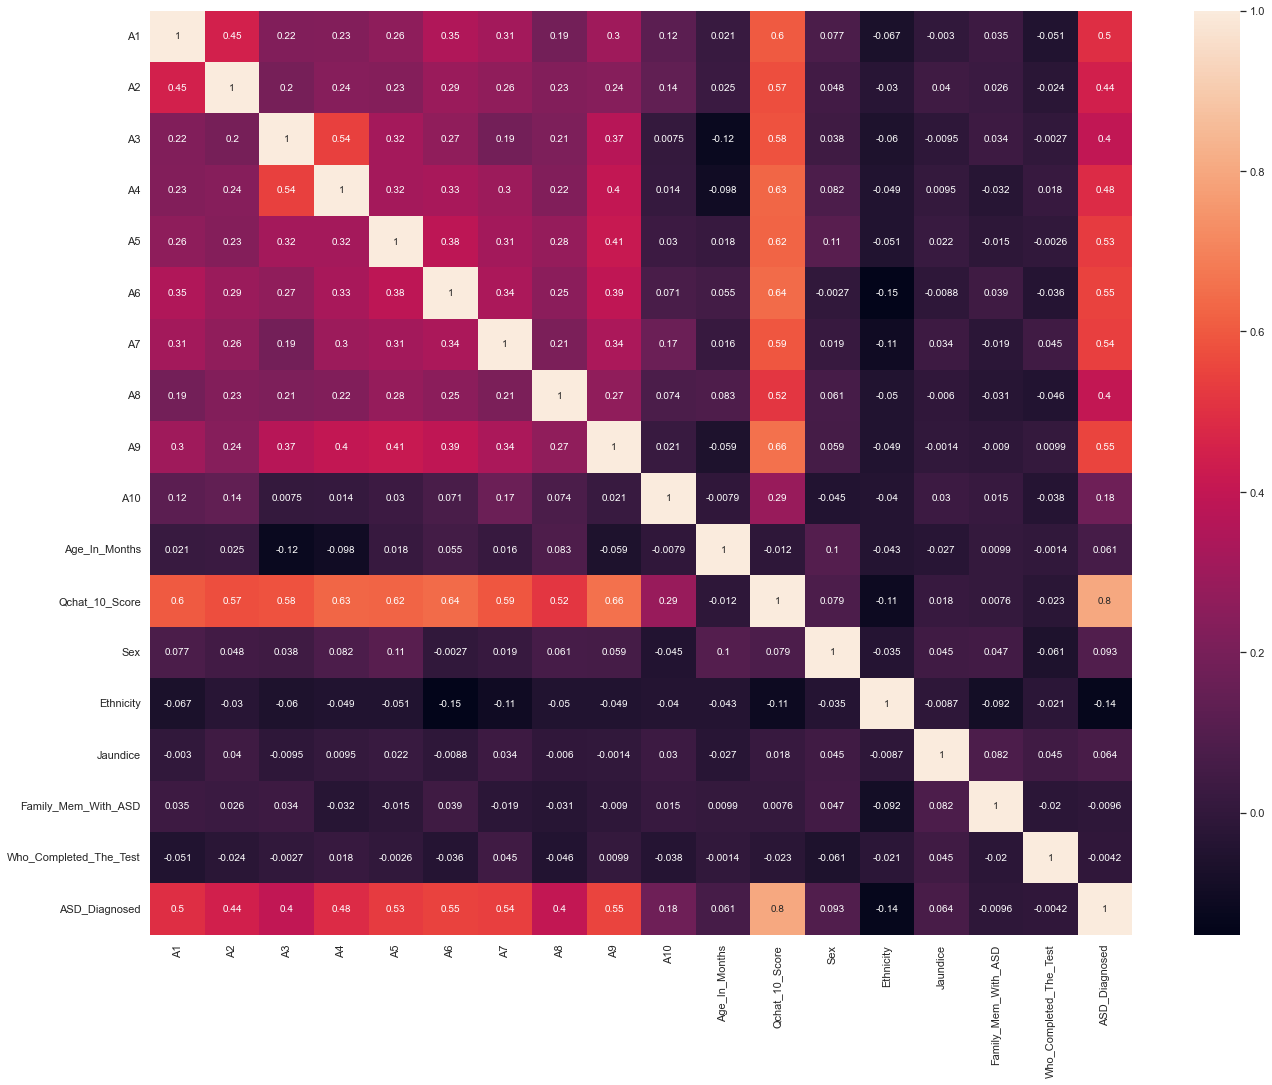

In [318]:
plt.figure(figsize=(22,17))
sns.heatmap(df.corr(),annot=True)

### Inference

* Columns A1 to A9 have moderate to high correaltions with the target variable
* QChat 10 score has the highest correlation with the target variable and also with columns A1 to A9 causing data leakage and multicollinearity
* QChat 10 score must be dropped for further analysis and modelling
* The rest of the columns seems to be fine, however the multicollinearity must be confirmed with VIF values before we proceed to modelling

# Checking Multicollinearity

In [319]:
X = df.drop('ASD_Diagnosed', axis=1)
Y = df['ASD_Diagnosed']

In [320]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



def calc_vif(X):
    """"
    Calculates the VIF values of each column and eliminates the top most column having VIF value>5
    The VIF values are calculated again and if the top most column is having VIF>5, then the process is repeated again
    The process continues until all the columns with high VIF values are dropped
    
    """
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF_Value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [321]:
VIF_Values = calc_vif(X).sort_values(by = 'VIF_Value', ascending = False)
VIF_Values

,Features,VIF_Value
0,A1,inf
6,A7,inf
11,Qchat_10_Score,inf
9,A10,inf
1,A2,inf
7,A8,inf
8,A9,inf
5,A6,inf
4,A5,inf
3,A4,inf


In [322]:
for i in range(X.shape[1]):
    v = calc_vif(X).sort_values(by = 'VIF_Value', ascending = False)
    if (v.iloc[0,1] > 5):
        X = X.drop(columns=v.iloc[0,0])

In [323]:
X.shape

(975, 13)

In [324]:
# All the columns with VIF values above 5 are removed and thus multicollinearity in the dataset is handled
# VIF = 1 means no multicollinearity
# VIF between 1 to 5 means moderate
# VIF above 5 means high multicollinearity

calc_vif(X).sort_values(by = 'VIF_Value', ascending = False)

,Features,VIF_Value
10,Ethnicity,3.865137
5,A7,3.760441
2,A4,3.339155
4,A6,3.268415
3,A5,3.001951
9,Sex,2.971627
7,A9,2.950219
1,A3,2.511869
8,A10,2.368168
0,A2,2.198267


### Inference

* Columns A1, Qchat_10_Score, Who_Completed_The_Test, Sex columns were removed due to high VIF values which leads to multicollinearity

<AxesSubplot:>

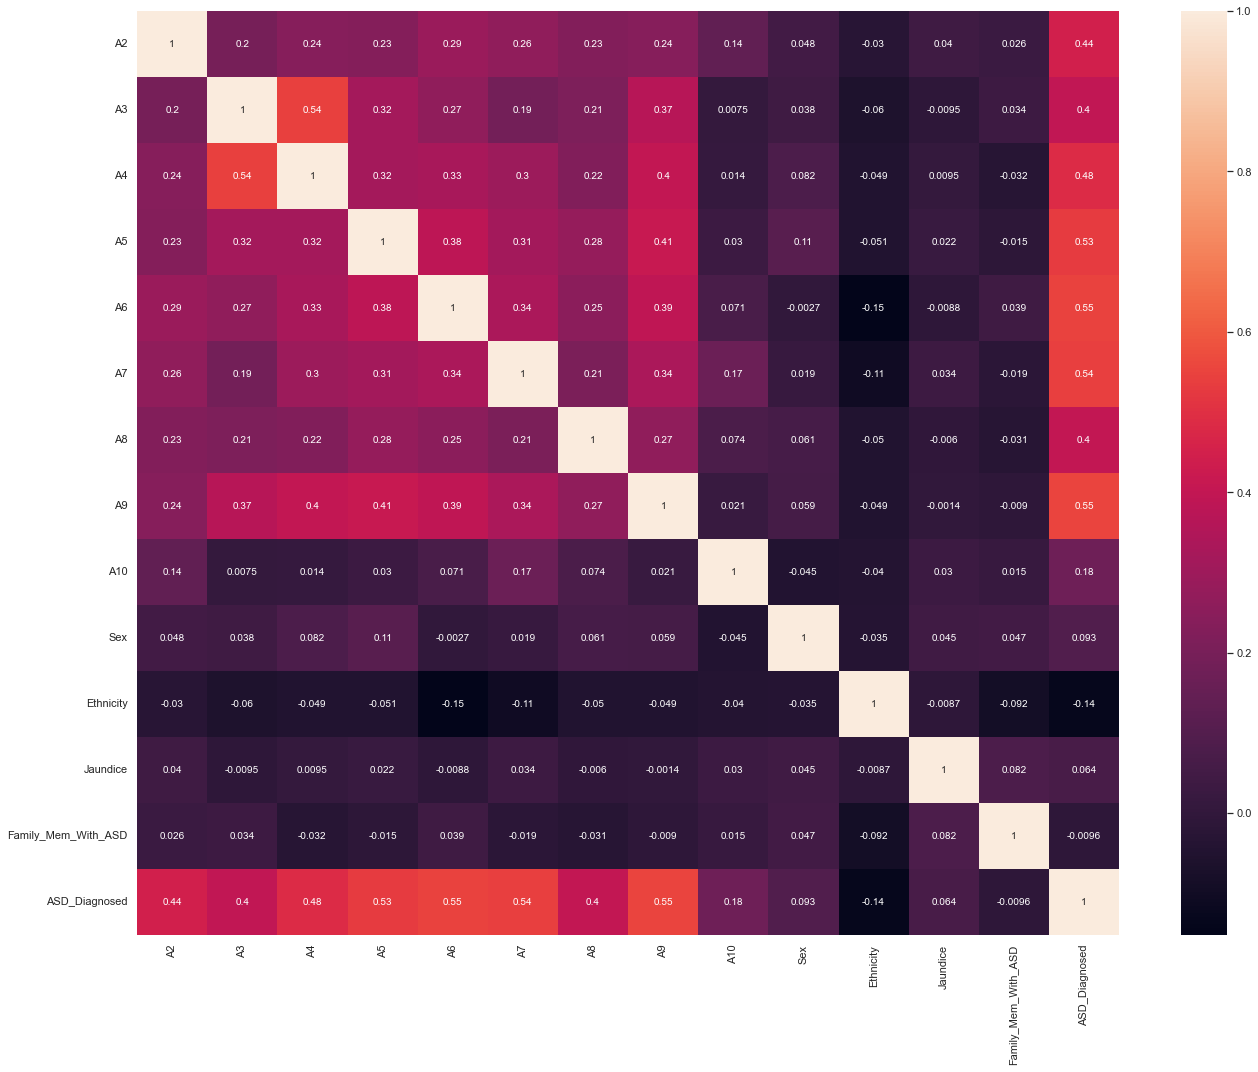

In [325]:
df_vif = pd.concat([X,Y], axis=1)
plt.figure(figsize=(22,17))
sns.heatmap(df_vif.corr(),annot=True)

# Modelling

In [326]:
# Getting the count of number of records for each target class

df1 = df_vif.copy()

df1.ASD_Diagnosed.value_counts()

1    691
0    284
Name: ASD_Diagnosed, dtype: int64

In [327]:
df1.head()

,A2,A3,A4,A5,A6,A7,A8,A9,A10,Sex,Ethnicity,Jaundice,Family_Mem_With_ASD,ASD_Diagnosed
0,0,0,0,0,0,1,1,0,1,0,8,1,0,0
1,1,0,0,0,1,1,0,0,0,1,5,1,0,1
2,0,0,0,0,0,1,1,0,1,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0,1,1,1,1,1,1,1,0,5,0,1,1


In [328]:
df1.shape

(975, 14)

In [329]:
# upsampling using smote for handling the target variable class imbalance

X = df1.drop('ASD_Diagnosed', axis=1)
Y = df1['ASD_Diagnosed']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(682, 13) (293, 13) (682,) (293,)


# Upsampling

In [330]:
counter = Counter(Y_train)

print("=============================")

for value,count in counter.items():
    percentage = 100*count/len(Y_train)
    print(f"Class= {value}, n={count} ({percentage:.2f}%)")

oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

counter = Counter(Y_train)

print("=============================")

for value,count in counter.items():
    percentage = 100*count/len(Y_train)
    print(f"Class= {value}, n={count} ({percentage:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, Y_train.shape)

Class= 1, n=475 (69.65%)
Class= 0, n=207 (30.35%)
Class= 1, n=475 (50.00%)
Class= 0, n=475 (50.00%)
Upsampled data shape:  (950, 13) (950,)


# Note

## The dataframe in which high VIF columns were removed are being used to train the models

# Logistic Regression Model With SMOTE

In [331]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [332]:
#Building the LR model
model = LogisticRegression(solver='newton-cg', max_iter=10000, penalty='none',verbose=True, n_jobs=2)
model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [333]:
Y_train_predict = model.predict(X_train)
Y_test_predict = model.predict(X_test)

In [334]:
# Accuracy - Training Data
lr_train_accuracy=round(model.score(X_train, Y_train),2)
print("Linear Regression Train Accuracy:",lr_train_accuracy)

Linear Regression Train Accuracy: 0.99


Area under the curve: 0.999


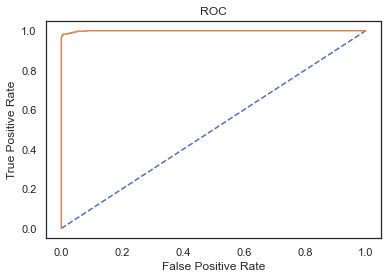

In [335]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(Y_train, probs)
print('Area under the curve: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

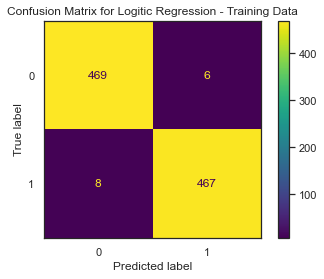

In [336]:
sns.set(style="white")
plot_confusion_matrix(model,X_train,Y_train);
plt.title('Confusion Matrix for Logitic Regression - Training Data')
plt.show()

In [337]:
print("Classification Report")
print(classification_report(Y_train, Y_train_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       475
           1       0.99      0.98      0.99       475

    accuracy                           0.99       950
   macro avg       0.99      0.99      0.99       950
weighted avg       0.99      0.99      0.99       950



In [338]:
# Accuracy - Training Data
lr_test_accuracy=model.score(X_test, Y_test)
print("Linear Regression Train Accuracy:",round(lr_test_accuracy,2))

Linear Regression Train Accuracy: 0.98


Area under the curve: 0.998


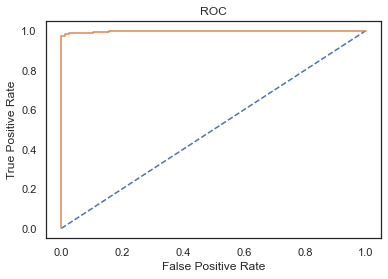

In [339]:
# Predict probabilities.
probs= model.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs= probs[:,1]
# Calculate AUC.
lr_test_auc= roc_auc_score(Y_test,probs)
print('Area under the curve: %.3f' % lr_test_auc)
# Calculate roc curve.
lr_test_fpr, lr_test_tpr, lr_test_thresholds= roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
# Plot the roc curve for the model.
plt.plot(lr_test_fpr,lr_test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

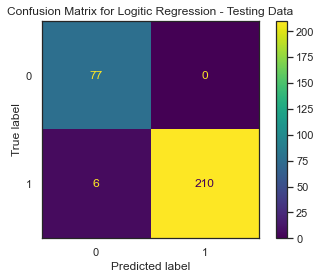

In [340]:
plot_confusion_matrix(model,X_test,Y_test);
plt.title('Confusion Matrix for Logitic Regression - Testing Data')
plt.show()

In [341]:
print("Classification Report")
print(classification_report(Y_test, Y_test_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        77
           1       1.00      0.97      0.99       216

    accuracy                           0.98       293
   macro avg       0.96      0.99      0.97       293
weighted avg       0.98      0.98      0.98       293



In [342]:
lr_metrics = classification_report(Y_test, Y_test_predict,output_dict=True)
df_lr=pd.DataFrame(lr_metrics).transpose()
lr_test_accuracy=round(df_lr.loc["accuracy"][2],2)
lr_test_f1=round(df_lr.loc["1"][2],2)
lr_test_recall=round(df_lr.loc["1"][1],2)
lr_test_precision=round(df_lr.loc["1"][0],2)
print ('LogisticRegression_test_accuracy ',lr_test_accuracy)
print ('LogisticRegression_test_precision ',lr_test_precision)
print ('LogisticRegression_test_recall ',lr_test_recall)
print ('LogisticRegression_test_f1 ',lr_test_f1)

LogisticRegression_test_accuracy  0.98
LogisticRegression_test_precision  1.0
LogisticRegression_test_recall  0.97
LogisticRegression_test_f1  0.99


In [343]:
index = ['Accuracy','Precision', 'Recall', 'F1-Score']

metrics = pd.DataFrame(
        {
            'Logistic Regression With Smote' : [lr_test_accuracy,lr_test_precision,lr_test_recall,lr_test_f1]
        },
    index=index
)

metrics

,Logistic Regression With Smote
Accuracy,0.98
Precision,1.00
Recall,0.97
F1-Score,0.99


In [344]:
metrics.T

,Accuracy,Precision,Recall,F1-Score
Logistic Regression With Smote,0.98,1.0,0.97,0.99


# Logistic Regression Model Without SMOTE

In [345]:
X = df1.drop('ASD_Diagnosed', axis=1)
Y = df1['ASD_Diagnosed']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(682, 13) (293, 13) (682,) (293,)


In [346]:
model = LogisticRegression(solver='newton-cg', max_iter=10000, penalty='none',verbose=True, n_jobs=2)
model.fit(X_train, Y_train)
Y_test_predict = model.predict(X_test)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


In [347]:
# Accuracy - Training Data
lr_test_accuracy=model.score(X_test, Y_test)
print("Linear Regression Train Accuracy:",round(lr_test_accuracy,2))

Linear Regression Train Accuracy: 0.98


In [348]:
print("Classification Report")
print(classification_report(Y_test, Y_test_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        77
           1       1.00      0.97      0.99       216

    accuracy                           0.98       293
   macro avg       0.96      0.99      0.97       293
weighted avg       0.98      0.98      0.98       293



In [349]:
lr_metrics = classification_report(Y_test, Y_test_predict,output_dict=True)
df_lr=pd.DataFrame(lr_metrics).transpose()
lr_test_accuracy=round(df_lr.loc["accuracy"][2],2)
lr_test_f1=round(df_lr.loc["1"][2],2)
lr_test_recall=round(df_lr.loc["1"][1],2)
lr_test_precision=round(df_lr.loc["1"][0],2)
print ('LogisticRegression_test_accuracy ',lr_test_accuracy)
print ('LogisticRegression_test_precision ',lr_test_precision)
print ('LogisticRegression_test_recall ',lr_test_recall)
print ('LogisticRegression_test_f1 ',lr_test_f1)

LogisticRegression_test_accuracy  0.98
LogisticRegression_test_precision  1.0
LogisticRegression_test_recall  0.97
LogisticRegression_test_f1  0.99


### Inference

* Upsampling does not show any difference in the metrics

In [350]:
metrics['Logistic Regression Without Smote'] = [lr_test_accuracy,lr_test_precision,lr_test_recall,lr_test_f1]
metrics.T

,Accuracy,Precision,Recall,F1-Score
Logistic Regression With Smote,0.98,1.0,0.97,0.99
Logistic Regression Without Smote,0.98,1.0,0.97,0.99


# KNN Model Without Smote

In [351]:
X = df1.drop('ASD_Diagnosed', axis=1)
Y = df1['ASD_Diagnosed']

In [352]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [353]:
from sklearn.neighbors import KNeighborsClassifier

In [354]:
#Building KNN model

KNN_model = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
KNN_model.fit(X_train, Y_train)

KNeighborsClassifier(weights='distance')

In [355]:
# Probability prediction of training data
Y_train_predict = KNN_model.predict(X_train)

# Probability prediction of testing data
Y_test_predict = KNN_model.predict(X_test)

In [356]:
print("Classification Report - Train")
print(classification_report(Y_train, Y_train_predict))

Classification Report - Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       475

    accuracy                           1.00       682
   macro avg       1.00      1.00      1.00       682
weighted avg       1.00      1.00      1.00       682



In [357]:
print("Classification report - Test")
print(classification_report(Y_test, Y_test_predict))

Classification report - Test
              precision    recall  f1-score   support

           0       0.78      0.92      0.85        77
           1       0.97      0.91      0.94       216

    accuracy                           0.91       293
   macro avg       0.88      0.91      0.89       293
weighted avg       0.92      0.91      0.91       293



In [358]:
# Tuning the parameters of KNN with GridSearchCV to improve the metrics

param_grid = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance']}

KNN_model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=KNN_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [359]:
grid_search.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [360]:
# Probability prediction of training data
Y_train_predict = grid_search.predict(X_train)

# Probability prediction of testing data
Y_test_predict = grid_search.predict(X_test)

In [361]:
print("Classification Report - Train")
print(classification_report(Y_train, Y_train_predict))

Classification Report - Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       475

    accuracy                           1.00       682
   macro avg       1.00      1.00      1.00       682
weighted avg       1.00      1.00      1.00       682



In [362]:
print("Classification report - Test")
print(classification_report(Y_test, Y_test_predict))

Classification report - Test
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        77
           1       0.98      0.91      0.94       216

    accuracy                           0.92       293
   macro avg       0.88      0.93      0.90       293
weighted avg       0.93      0.92      0.92       293



### Inference 
 
* Hyperparameter tuned KNN improved the f1-score marginally however still performs lower than logistic regression model

In [363]:
knn_metrics = classification_report(Y_test, Y_test_predict,output_dict=True)
df_knn=pd.DataFrame(knn_metrics).transpose()
knn_test_accuracy=round(df_knn.loc["accuracy"][2],2)
knn_test_f1=round(df_knn.loc["1"][2],2)
knn_test_recall=round(df_knn.loc["1"][1],2)
knn_test_precision=round(df_knn.loc["1"][0],2)
print ('KNN_test_accuracy ',knn_test_accuracy)
print ('KNN_test_precision ',knn_test_precision)
print ('KNN_test_recall ',knn_test_recall)
print ('KNN_test_f1 ',knn_test_f1)

KNN_test_accuracy  0.92
KNN_test_precision  0.98
KNN_test_recall  0.91
KNN_test_f1  0.94


In [364]:
metrics['KNN without SMOTE'] = [knn_test_accuracy,knn_test_precision,knn_test_recall,knn_test_f1]
metrics.T

,Accuracy,Precision,Recall,F1-Score
Logistic Regression With Smote,0.98,1.00,0.97,0.99
Logistic Regression Without Smote,0.98,1.00,0.97,0.99
KNN without SMOTE,0.92,0.98,0.91,0.94


# Model Building using the top 3 Ethnic Groups

In [398]:
df_Ethnic

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_In_Months,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_Mem_With_ASD,Who_Completed_The_Test,ASD_Diagnosed
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,0
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,1
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,1
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,1
6,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,0,0,0,0,0,0,0,0,0,30,0,f,White European,no,no,family member,0
1049,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,0
1051,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,1
1052,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,0


In [399]:
df_Ethnic['Ethnicity'].value_counts()

White European    312
asian             272
middle eastern    168
Name: Ethnicity, dtype: int64

In [400]:
# Encoding the target variable
# Encoding "Yes" to 1 and "No" to 0

df_Ethnic['ASD_Diagnosed'].replace({'Yes':1, 'No':0}, inplace=True)

In [401]:
df_Ethnic = ordinal_encoder(df_Ethnic, df_Ethnic.drop(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_In_Months', 'Qchat_10_Score','ASD_Diagnosed'], axis=1).columns)
df_Ethnic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 1053
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   A1                      752 non-null    int64
 1   A2                      752 non-null    int64
 2   A3                      752 non-null    int64
 3   A4                      752 non-null    int64
 4   A5                      752 non-null    int64
 5   A6                      752 non-null    int64
 6   A7                      752 non-null    int64
 7   A8                      752 non-null    int64
 8   A9                      752 non-null    int64
 9   A10                     752 non-null    int64
 10  Age_In_Months           752 non-null    int64
 11  Qchat_10_Score          752 non-null    int64
 12  Sex                     752 non-null    int32
 13  Ethnicity               752 non-null    int32
 14  Jaundice                752 non-null    int32
 15  Family_Mem_With_ASD   

In [402]:
X = df_Ethnic.drop('ASD_Diagnosed', axis=1)
Y = df_Ethnic['ASD_Diagnosed']

In [403]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



def calc_vif(X):
    """"
    Calculates the VIF values of each column and eliminates the top most column having VIF value>5
    The VIF values are calculated again and if the top most column is having VIF>5, then the process is repeated again
    The process continues until all the columns with high VIF values are dropped
    
    """
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF_Value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [404]:
VIF_Values = calc_vif(X).sort_values(by = 'VIF_Value', ascending = False)
VIF_Values

,Features,VIF_Value
0,A1,inf
6,A7,inf
11,Qchat_10_Score,inf
9,A10,inf
1,A2,inf
7,A8,inf
8,A9,inf
5,A6,inf
4,A5,inf
3,A4,inf


In [405]:
for i in range(X.shape[1]):
    v = calc_vif(X).sort_values(by = 'VIF_Value', ascending = False)
    if (v.iloc[0,1] > 5):
        X = X.drop(columns=v.iloc[0,0])

In [406]:
X.shape

(752, 13)

In [407]:
# All the columns with VIF values above 5 are removed and thus multicollinearity in the dataset is handled
# VIF = 1 means no multicollinearity
# VIF between 1 to 5 means moderate
# VIF above 5 means high multicollinearity

calc_vif(X).sort_values(by = 'VIF_Value', ascending = False)

,Features,VIF_Value
5,A7,3.609265
2,A4,3.309075
4,A6,3.260676
3,A5,3.021407
7,A9,3.016702
9,Sex,2.621037
1,A3,2.445933
8,A10,2.240050
0,A2,2.088468
6,A8,2.071190


In [408]:
# Getting the count of number of records for each target class
df_vif = pd.concat([X,Y], axis=1)
df1 = df_vif.copy()

df1.ASD_Diagnosed.value_counts()

1    525
0    227
Name: ASD_Diagnosed, dtype: int64

In [409]:
# upsampling using smote for handling the target variable class imbalance

X = df1.drop('ASD_Diagnosed', axis=1)
Y = df1['ASD_Diagnosed']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(526, 13) (226, 13) (526,) (226,)


In [410]:
#Building the LR model
model = LogisticRegression(solver='newton-cg', max_iter=10000, penalty='none',verbose=True, n_jobs=2)
model.fit(X_train, Y_train)
Y_test_predict = model.predict(X_test)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


In [411]:
print("Classification Report")
print(classification_report(Y_test, Y_test_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        77
           1       0.97      0.99      0.98       149

    accuracy                           0.97       226
   macro avg       0.97      0.97      0.97       226
weighted avg       0.97      0.97      0.97       226



In [412]:
lr_metrics = classification_report(Y_test, Y_test_predict,output_dict=True)
df_lr=pd.DataFrame(lr_metrics).transpose()
lr_test_accuracy=round(df_lr.loc["accuracy"][2],2)
lr_test_f1=round(df_lr.loc["1"][2],2)
lr_test_recall=round(df_lr.loc["1"][1],2)
lr_test_precision=round(df_lr.loc["1"][0],2)
print ('LogisticRegression_test_accuracy ',lr_test_accuracy)
print ('LogisticRegression_test_precision ',lr_test_precision)
print ('LogisticRegression_test_recall ',lr_test_recall)
print ('LogisticRegression_test_f1 ',lr_test_f1)

LogisticRegression_test_accuracy  0.97
LogisticRegression_test_precision  0.97
LogisticRegression_test_recall  0.99
LogisticRegression_test_f1  0.98


In [413]:
metrics['Logistic Regression with top 3 Ethnic Groups'] = [lr_test_accuracy,lr_test_precision,lr_test_recall,lr_test_f1]
metrics.T

,Accuracy,Precision,Recall,F1-Score
Logistic Regression With Smote,0.98,1.00,0.97,0.99
Logistic Regression Without Smote,0.98,1.00,0.97,0.99
KNN without SMOTE,0.92,0.98,0.91,0.94
Logistic Regression with top 3 Ethnic Groups,0.97,0.97,0.99,0.98
